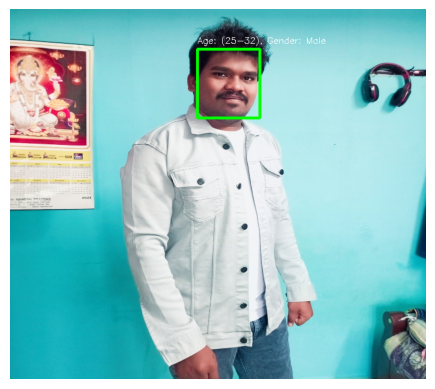

In [2]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('venu.jpg')
image = cv2.resize(image, (720, 640))
face = cv2.dnn.readNet('opencv_face_detector_uint8.pb', 'opencv_face_detector.pbtxt')
age = cv2.dnn.readNet('age_net.caffemodel', 'age_deploy.prototxt')
gen = cv2.dnn.readNet('gender_net.caffemodel', 'gender_deploy.prototxt')
age_categories = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
gender_categories = ['Male', 'Female']
MODEL_MEAN_VALUES = [78.42633776, 87.76891437, 114.89584775]
fr_h, fr_w = image.shape[0], image.shape[1]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123], True, False)
face.setInput(blob)
detections = face.forward()
faceBoxes = []
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * fr_w)
        y1 = int(detections[0, 0, i, 4] * fr_h)
        x2 = int(detections[0, 0, i, 5] * fr_w)
        y2 = int(detections[0, 0, i, 6] * fr_h)
        faceBoxes.append([x1, y1, x2, y2])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), int(round(fr_h / 150)), 8)
for box in faceBoxes:
    face_blob = image[box[1]:box[3], box[0]:box[2]]
    age.setInput(cv2.dnn.blobFromImage(face_blob, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False))
    age_pred = age.forward()[0]
    age_index = age_pred.argmax()
    age_label = age_categories[age_index]

    gen.setInput(cv2.dnn.blobFromImage(face_blob, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False))
    gen_pred = gen.forward()[0]
    gen_index = gen_pred.argmax()
    gender_label = gender_categories[gen_index]

    label_text = f"Age: {age_label}, Gender: {gender_label}"
    cv2.putText(image, label_text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()